In [2]:
#TASK 2
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras


In [5]:

#reading data
stock_price_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stock.csv")
stock_vol_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stock_volume.csv")

In [6]:
#sorting values
stock_price_df.sort_values(by=["Date"],inplace=True)
stock_vol_df.sort_values(by=["Date"],inplace=True)


In [7]:
#checking null values
print(stock_price_df.isnull().sum())
print(stock_vol_df.isnull().sum())
#no null values present in the data


Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64
Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64


In [8]:
#Info of data prices
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [9]:
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [10]:
#mini challenge 1
stock_vol_df["AAPL"].describe()

count    2.159000e+03
mean     5.820332e+07
std      4.568141e+07
min      1.136200e+07
25%      2.769930e+07
50%      4.209420e+07
75%      7.182480e+07
max      3.765300e+08
Name: AAPL, dtype: float64

In [11]:
#mean=5.820332e+07
#max=3.765300e+08

In [12]:
stock_vol_df.describe()

AAPL            BA             T           MGM          AMZN  \
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03   
mean   5.820332e+07  6.419916e+06  2.832131e+07  9.845582e+06  4.102673e+06   
std    4.568141e+07  9.711873e+06  1.428911e+07  7.295753e+06  2.290722e+06   
min    1.136200e+07  7.889000e+05  6.862400e+06  9.507000e+05  8.813000e+05   
25%    2.769930e+07  3.031850e+06  2.002150e+07  5.796450e+06  2.675700e+06   
50%    4.209420e+07  3.991000e+06  2.485930e+07  7.899800e+06  3.494800e+06   
75%    7.182480e+07  5.325900e+06  3.210565e+07  1.104055e+07  4.768150e+06   
max    3.765300e+08  1.032128e+08  1.950827e+08  9.009820e+07  2.385610e+07   

                IBM          TSLA          GOOG         sp500  
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  
mean   4.453090e+06  7.001302e+06  2.498238e+06  3.680732e+09  
std    2.462811e+06  5.781208e+06  1.928407e+06  8.622717e+08  
min    1.193000e+06  3.649000e+05  7.900000e+03  1.248960e+09  
25%    3.111250e+06  3.433450e+06  1.325400e+06  3.211890e+09  
50%    3.825000e+06  5.581100e+06  1.813900e+06  3.526890e+09  
75%    4.937300e+06  8.619550e+06  3.245350e+06  3.933290e+09  
max    3.049020e+07  6.093880e+07  2.497790e+07  9.044690e+09

In [13]:
#sp500 is the most traded security


In [14]:
stock_price_df.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

In [15]:
#mean price =5.820332e+07
#max price=1643.000000	

In [16]:
#TASK 3
def normalize(df):
  x = df.copy()

  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x


In [17]:
def interactive_plot(df, title):
  fig = px.line(title = title)

  for i in df.columns[1:]:
    fig.add_scatter(x = df["Date"], y = df[i], name = i)

  fig.show()

In [18]:
# mini challege
interactive_plot(stock_vol_df,"Stocks volume")

In [19]:
interactive_plot(normalize(stock_price_df), "Stock Prices")

In [20]:
interactive_plot(normalize(stock_vol_df), "Normalized Volume")
# sp500 has the highest volumes as it is index in itself than other stocks


In [23]:
#Task 4 Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_data,volume_data,stock_name):
  date_df=price_data['Date']
  price_df=price_data[stock_name]
  volume_df=volume_data[stock_name]
  c_df=pd.concat([date_df,price_df,volume_df],axis=1)
  c_df.columns=['Date','Price','Volume']
  return c_df

In [24]:
#Trying for the apple data
price_volume_df=individual_stock(stock_price_df,stock_vol_df,'AAPL')
price_volume_df.head()

Date      Price    Volume
0  2012-01-12  60.198570  53146800
1  2012-01-13  59.972858  56505400
2  2012-01-17  60.671429  60724300
3  2012-01-18  61.301430  69197800
4  2012-01-19  61.107143  65434600

In [26]:
future_days=30
#creating a new columns (target) shifted "x" units/days up
price_volume_df["Prediction"]=price_volume_df[["Price"]].shift(-future_days)
price_volume_df.head()

Date      Price    Volume  Prediction
0  2012-01-12  60.198570  53146800   75.108574
1  2012-01-13  59.972858  56505400   76.487144
2  2012-01-17  60.671429  60724300   77.491432
3  2012-01-18  61.301430  69197800   77.781425
4  2012-01-19  61.107143  65434600   77.882858

In [27]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
data=S.fit_transform(price_volume_df.iloc[:,1:])
data=pd.DataFrame(data,columns=price_volume_df.columns[1:])
data.head()

Price    Volume  Prediction
0 -1.138538 -0.110717   -0.943536
1 -1.141726 -0.037177   -0.924052
2 -1.131860  0.055199   -0.909857
3 -1.122964  0.240733   -0.905758
4 -1.125707  0.158335   -0.904325

In [28]:
#creating the feature data set(X) and converting it to numpy array and removing  the last row
X=np.array(data.drop(['Prediction'],1))[:-future_days]
X.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



(2129, 2)

In [29]:
#Creating the targt data set (y) and coverting it into numpy array and all of the target values except the last x rows
y=np.array(data['Prediction'][:-future_days]).reshape(-1,1)
y.shape

(2129, 1)

In [30]:
#split the data into 70% training and 30% testing
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30)


In [31]:
#Mini challenge 3
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AMZN')
price_volume_df


Date        Price   Volume
0     2012-01-12   175.929993  5385800
1     2012-01-13   178.419998  4753500
2     2012-01-17   181.660004  5644500
3     2012-01-18   189.440002  7473500
4     2012-01-19   194.449997  7096000
...          ...          ...      ...
2154  2020-08-05  3205.030029  3930000
2155  2020-08-06  3225.000000  3940600
2156  2020-08-07  3167.459961  3929600
2157  2020-08-10  3148.159912  3167300
2158  2020-08-11  3080.669922  3706600

[2159 rows x 3 columns]

In [32]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df


Date        Price      Volume
0     2012-01-12  1295.500000  4019890000
1     2012-01-13  1289.089966  3692370000
2     2012-01-17  1293.670044  4010490000
3     2012-01-18  1308.040039  4096160000
4     2012-01-19  1314.500000  4465890000
...          ...          ...         ...
2154  2020-08-05  3327.770020  4732220000
2155  2020-08-06  3349.159912  4267490000
2156  2020-08-07  3351.280029  4104860000
2157  2020-08-10  3360.469971  4318570000
2158  2020-08-11  3333.689941  5087650000

[2159 rows x 3 columns]

In [33]:
#task 7


In [53]:
#Getting the last rows of the feature dataset
x_future=data.drop(["Prediction"],1)[:-future_days]

x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



(30, 2)

In [84]:
#task 7 checking the performance with ridge regression
from sklearn.linear_model import Ridge
model=Ridge(alpha=1)
model.fit(X_train,y_train)

#prediction of future values
ypred=model.predict(x_future)
ypred

#checking score
model.score(X_train,y_train)






0.941408986100114

In [85]:
prediction=ypred
df=data[X.shape[0]:]
df["Prediction"]=prediction
Date=stock_price_df.iloc[:,0:1]
df["Date"]=Date
df = df[ ['Date'] + [ col for col in df.columns if col != 'Date' ] ]


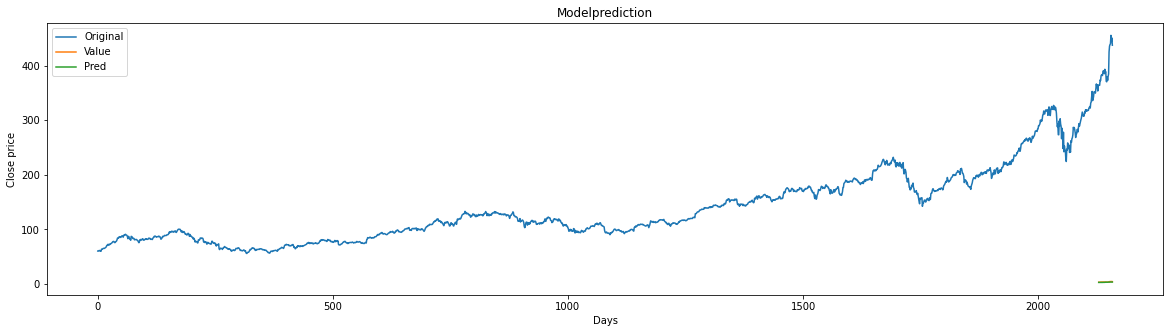

In [88]:
#plot
plt.figure(figsize=(20,5))
plt.title("Modelprediction")
plt.xlabel("Days")
plt.ylabel("Close price")

plt.plot(stock_price_df["AAPL"])
plt.plot(df[['Price','Prediction']])


plt.legend(['Original','Value',"Pred"])
plt.show()

In [89]:
#changing the value of alpha 10
model=Ridge(alpha=10)
model.fit(X_train,y_train)

#prediction of future values
ypred=model.predict(x_future)
ypred

#model score
model.score(X_train,y_train)


0.9413325183730293

In [91]:
#changing the value of alpha 30
model=Ridge(alpha=20)
model.fit(X_train,y_train)

#prediction of future values
ypred=model.predict(x_future)
ypred

#model score
model.score(X_train,y_train)


0.9411083652685536

In [92]:
#changing the value of alpha 50
model=Ridge(alpha=50)
model.fit(X_train,y_train)

#prediction of future values
ypred=model.predict(x_future)
ypred
#model score 
model.score(X_train,y_train)


0.939657834100471

In [ ]:
#increasing the alpha value is actually decreasing the model score value

In [ ]:
#LSTM code

In [93]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df
df=price_volume_df.iloc[:,1:]

In [94]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
df = normalizer.fit_transform(np.array(df).reshape(-1,1))
#normalize the data

In [95]:
#since we have to take care of the data as it is time series
#Defining test and train data sizes
train_size = int(len(df)*0.70)
test_size = len(df) - train_size

In [96]:
#seeing the size
print(train_size,test_size)

3022 1296


In [97]:
#Splitting data between train and test
df_train, df_test = df[0:train_size,:], df[train_size:len(df),:1]

In [98]:
#creating dataset in time series for LSTM model 
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [99]:
#Taking 10 days price as one record for training
time_stamp = 10
X_train, y_train = create_ds(df_train,time_stamp)
X_test, y_test = create_ds(df_test,time_stamp)

In [100]:

print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)

(3011, 10) (3011,) (1285, 10) (1285,)


In [101]:
#feeding  1D to 3D
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [102]:
#task 7
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)


outputs = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10, 150)           91200     
                                                                 
 dropout (Dropout)           (None, 10, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 150)           180600    
                                                                 
 dropout_1 (Dropout)         (None, 10, 150)           0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [103]:
ypred=model.predict(X_test)
ypred.shape
a=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":ypred.flatten()})

In [104]:
#50 units
#task 7
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(50, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(50, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(50)(x)


outputs = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_3 (LSTM)               (None, 10, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_3 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51  

In [105]:
ypred=model.predict(X_test)
ypred.shape
a=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":ypred.flatten()})

In [ ]:
#testing different stocks 


Index(['Date', 'Price', 'Volume'], dtype='object')

In [106]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'BA')
price_volume_df
df=price_volume_df.iloc[:,1:]


#normalize data
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
df = normalizer.fit_transform(np.array(df).reshape(-1,1))


#since we have to take care of the data as it is time series
#Defining test and train data sizes
train_size = int(len(df)*0.70)
test_size = len(df) - train_size

#Splitting data between train and test
df_train, df_test = df[0:train_size,:], df[train_size:len(df),:1]

#creating dataset in time series for LSTM model 
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

#Taking 10 days price as one record for training
time_stamp = 10
X_train, y_train = create_ds(df_train,time_stamp)
X_test, y_test = create_ds(df_test,time_stamp)

#feeding  1D to 3D
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#task 7
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)


outputs = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

ypred=model.predict(X_test)
ypred.shape
a=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":ypred.flatten()})
a.head()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_6 (LSTM)               (None, 10, 150)           91200     
                                                                 
 dropout_4 (Dropout)         (None, 10, 150)           0         
                                                                 
 lstm_7 (LSTM)               (None, 10, 150)           180600    
                                                                 
 dropout_5 (Dropout)         (None, 10, 150)           0         
                                                                 
 lstm_8 (LSTM)               (None, 150)               180600    
                                                                 
 dense_2 (Dense)             (None, 1)                 151 

Actual  Predicted
0  0.000003   0.000488
1  0.043965   0.000507
2  0.000003   0.000416
3  0.040744   0.000430
4  0.000003   0.000356

In [107]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'GOOG')
price_volume_df
df=price_volume_df.iloc[:,1:]


#normalize data
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
df = normalizer.fit_transform(np.array(df).reshape(-1,1))


#since we have to take care of the data as it is time series
#Defining test and train data sizes
train_size = int(len(df)*0.70)
test_size = len(df) - train_size

#Splitting data between train and test
df_train, df_test = df[0:train_size,:], df[train_size:len(df),:1]

#creating dataset in time series for LSTM model 
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

#Taking 10 days price as one record for training
time_stamp = 10
X_train, y_train = create_ds(df_train,time_stamp)
X_test, y_test = create_ds(df_test,time_stamp)

#feeding  1D to 3D
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#task 7
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)


outputs = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

ypred=model.predict(X_test)
ypred.shape
a=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":ypred.flatten()})
a.head()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_9 (LSTM)               (None, 10, 150)           91200     
                                                                 
 dropout_6 (Dropout)         (None, 10, 150)           0         
                                                                 
 lstm_10 (LSTM)              (None, 10, 150)           180600    
                                                                 
 dropout_7 (Dropout)         (None, 10, 150)           0         
                                                                 
 lstm_11 (LSTM)              (None, 150)               180600    
                                                                 
 dense_3 (Dense)             (None, 1)                 151 

Actual  Predicted
0  0.000036  -0.000673
1  0.053361  -0.000705
2  0.000035  -0.000695
3  0.056704  -0.000715
4  0.000036  -0.000708

In [108]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'TSLA')
price_volume_df
df=price_volume_df.iloc[:,1:]


#normalize data
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
df = normalizer.fit_transform(np.array(df).reshape(-1,1))


#since we have to take care of the data as it is time series
#Defining test and train data sizes
train_size = int(len(df)*0.70)
test_size = len(df) - train_size

#Splitting data between train and test
df_train, df_test = df[0:train_size,:], df[train_size:len(df),:1]

#creating dataset in time series for LSTM model 
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

#Taking 10 days price as one record for training
time_stamp = 10
X_train, y_train = create_ds(df_train,time_stamp)
X_test, y_test = create_ds(df_test,time_stamp)

#feeding  1D to 3D
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#task 7
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)


outputs = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

ypred=model.predict(X_test)
ypred.shape
a=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":ypred.flatten()})
a.head()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_12 (LSTM)              (None, 10, 150)           91200     
                                                                 
 dropout_8 (Dropout)         (None, 10, 150)           0         
                                                                 
 lstm_13 (LSTM)              (None, 10, 150)           180600    
                                                                 
 dropout_9 (Dropout)         (None, 10, 150)           0         
                                                                 
 lstm_14 (LSTM)              (None, 150)               180600    
                                                                 
 dense_4 (Dense)             (None, 1)                 151 

Actual  Predicted
0  0.000005   0.001220
1  0.089686   0.001246
2  0.000005   0.001177
3  0.086767   0.001208
4  0.000005   0.001129